In [4]:
#Imports
import numpy as np
import pandas as pd
import random
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [8]:
#Methods
def sort_db_value(db,value,asc=False):
    return db.sort_values(by = value, ascending = asc)

def freq_array(freq_list):
    freq = []
    for i in freq_list:
        freq.append(i)
    return freq

def set_labels(freq, ax,horz_shift=.2,vert_shift=1000):
    for i, v in enumerate(freq):
        ax.text(i-horz_shift,v+vert_shift, str(round(v,2)), weight = "bold")

In [6]:
irs_db_region2 = pd.read_csv('Data/eo2.csv')

In [7]:
irs_db_region2.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,2120849,ANCILLA DOMINI SISTERS INC,NaN,LOCAL,DONALDSON,IN,46513-0000,928,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
1,10036381,DISABLED AMERICAN VETERANS,% BILLIENITA CARDONA,15623 S CENTERLINE RD,RUDYARD,MI,49780-9349,557,4,9,...,0,0,2,0,6,0.0,0.0,0.0,NaN,93 STRAITS
2,10060379,HEALING AND DELIVERANCE MINISTRY INC,NaN,14103 BYRNE PARK DR,CLARKSBURG,MD,20871-6337,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN
3,10123106,MORNING STAR BAPTIST CHURCH,NaN,3204 BROTHERS PL SE,WASHINGTON,DC,20032-1501,1961,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
4,10158948,SIGMA KAPPA SORORITY,% NATIONAL HEADQUARTERS,695 PRO-MED LN STE 300,CARMEL,IN,46032-5331,594,7,6,...,8,7,1,0,5,10360714.0,6808224.0,4862977.0,NaN,NaN


In [9]:
irs_db_region2 = irs_db_region2[irs_db_region2["DEDUCTIBILITY"] == 1]

In [10]:
irs_db_region2 = irs_db_region2.drop(columns=['FILING_REQ_CD',"PF_FILING_REQ_CD","STATUS","NTEE_CD"])

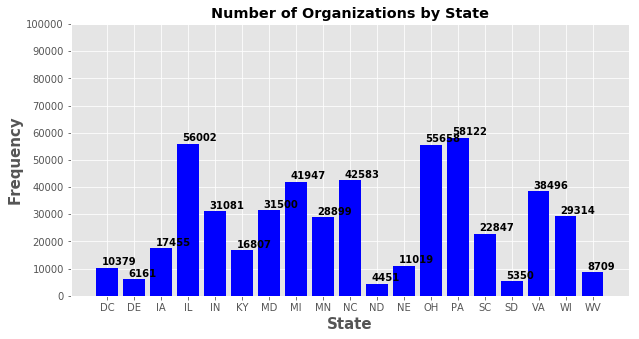

In [17]:
# State Count Bar Graph
state_df_count = irs_db_region2.groupby("STATE").size()
states = list(state_df_count.index.values)
freq = []
for i in state_df_count:
    freq.append(i)
fig,ax = plt.subplots(figsize = (10,5))
ax.bar(states,freq, color = "b");
ax.set_yticks(np.arange(0,100001,10000)) ;
ax.set_title("Number of Organizations by State", weight = "bold");
ax.set_xlabel("State", fontsize=15, weight = "bold");
ax.set_ylabel("Frequency", fontsize=15, weight = "bold");

for i, v in enumerate(freq):
    ax.text(i-.2,v+1000, str(v), weight = "bold")